In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
train= pd.read_csv("trainwine.csv",index_col=0)
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
ID,,,,,,,,,,,,
1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0,5
2,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9,7
3,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6,5
4,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
5,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3946,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,8
3947,6.3,0.30,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6
3948,6.6,0.15,0.34,5.1,0.055,34.0,125.0,0.99420,3.36,0.42,9.6,5


In [4]:
X = train.iloc[:,:-1]
X
y = train.iloc[:,-1]
y

ID
1       5
2       7
3       5
4       6
5       7
       ..
3946    8
3947    6
3948    5
3949    6
3950    6
Name: Quality, Length: 3950, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=42)
var=x_train.var()
var

fixed acidity              0.709098
volatile acidity           0.010109
citric acid                0.014570
residual sugar            25.957759
chlorides                  0.000465
free sulfur dioxide      307.647639
total sulfur dioxide    1887.082966
density                    0.000009
pH                         0.022596
sulphates                  0.013377
alcohol                    1.545560
dtype: float64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt_cls = DecisionTreeClassifier(random_state=42)

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []
for kval in range(1, 12):
    selector = SelectKBest(chi2, k=kval)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    dt_cls.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = dt_cls.predict(sel_X_test_v2)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)
    print(f1_score_kbest)
    print(kval)

print(f1_score_list)

0.403
1
0.459
2
0.485
3
0.572
4
0.534
5
0.533
6
0.56
7
0.542
8
0.544
9
0.538
10
0.535
11
[0.403, 0.459, 0.485, 0.572, 0.534, 0.533, 0.56, 0.542, 0.544, 0.538, 0.535]


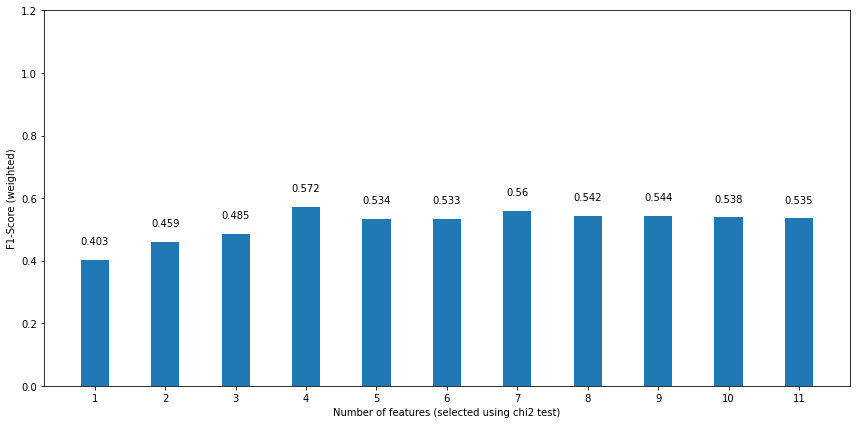

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

In [8]:
x_train_v1 = x_train.copy()
x_train_v1

from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_v1)
norm_x_train = norm.transform(x_train_v1)
print("Variance of all features after normalization is:")
print(norm_x_train.var(axis=0))

Variance of all features after normalization is:
[5.39315687e-04 1.81584211e-06 1.86041094e-06 1.19529030e-03
 4.04793844e-08 7.09208245e-03 6.55275948e-04 1.00886416e-05
 1.04757075e-04 2.80599678e-06 1.58035687e-03]


In [11]:
from sklearn.feature_selection import VarianceThreshold

feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

selector = VarianceThreshold(threshold=1e-4)  # Removing the features as per the threshold value ...
selected_features = selector.fit_transform(norm_x_train)

# Get the support mask
feature_mask = selector.get_support()

# Identify eliminated features
eliminated_features = [feat[i] for i, selected in enumerate(feature_mask) if not selected]

print("Eliminated features are: ")
print(eliminated_features)


Eliminated features are: 
['volatile acidity', 'citric acid', 'chlorides', 'density', 'sulphates']


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Classifier with all features
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(x_train, y_train)
preds = dt_cls.predict(x_test)
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
print("Score with all features: ", f1_score_all)

# Classifier with selected features with variance threshold
x_train_sel = x_train.drop(eliminated_features, axis=1)
x_test_sel = x_test.drop(eliminated_features, axis=1)
dt_cls.fit(x_train_sel, y_train)
preds_sel = dt_cls.predict(x_test_sel)
f1_score_sel = round(f1_score(y_test, preds_sel, average='weighted'), 3)
print("Score with selected features: ", f1_score_sel)

Score with all features:  0.535
Score with selected features:  0.57


In [15]:
from sklearn.feature_selection import RFE

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()
RFE_selector = RFE(estimator=dt_cls, n_features_to_select=4, step=1)
RFE_selector.fit(X_train_v3, y_train_v3)

rfe_pred = RFE_selector.predict(X_test_v3)
print(rfe_pred)

[7 6 5 ... 6 6 5]


In [16]:
f1_score_rfe = round(f1_score(y_test, rfe_pred, average='weighted'), 3)
print("Score of RFE classification: ",f1_score_rfe)

Score of RFE classification:  0.549


In [17]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with the desired parameters
rfc = RandomForestClassifier(max_depth=8, random_state=0)

# Create an RFECV object
clf = RFECV(rfc, step=1, cv=3)

# Fit the RFECV on your training data
clf.fit(X_train_v4, y_train_v4)

# Access the optimal number of features
print("Optimal number of features : ", clf.n_features_)

Optimal number of features :  11


Cross-validated scores for different numbers of features:
[0.45786709 0.50632702 0.54465854 0.54972392 0.56383352 0.56491184
 0.57359177 0.5732322  0.57395448 0.57033836 0.57793291]


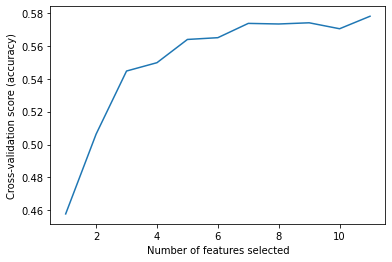

In [22]:
print("Cross-validated scores for different numbers of features:")
print(clf.grid_scores_)

# Optionally, you can visualize the cross-validated scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(clf.grid_scores_) + 1), clf.grid_scores_)
plt.show()

In [24]:
y = train.iloc[:,-1]
y

test = pd.read_csv("testwine.csv")
test
id=test.iloc[:,0]
id

0        1
1        2
2        3
3        4
4        5
      ... 
943    944
944    945
945    946
946    947
947    948
Name: ID, Length: 948, dtype: int64

In [25]:
test = pd.read_csv("testwine.csv",index_col=0)
test

selector = SelectKBest(chi2, k=4)
selector.fit(X, y)
    
sel_X = selector.transform(X)
sel_X_test = selector.transform(test)
    
dt_cls.fit(sel_X, y)
kbest_preds = dt_cls.predict(sel_X_test)

In [26]:
final = pd.DataFrame({'ID': id, 'Quality': kbest_preds})
final.to_csv('submission.csv',index=False)
final

,ID,Quality
0,1,5
1,2,6
2,3,7
3,4,5
4,5,6
...,...,...
943,944,6
944,945,4
945,946,6
946,947,6


# Histogram of Target Variable:
Visualize the distribution of the target variable "Quality" in your training data using a histogram.

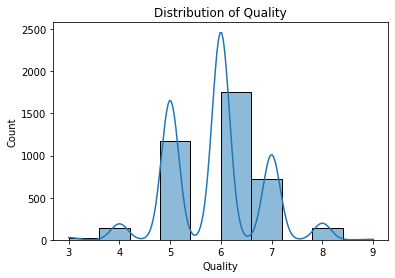

In [27]:
import seaborn as sns
sns.histplot(train['Quality'], bins=10, kde=True)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')
plt.show()


# Correlation Heatmap: 
Show a heatmap of the correlations between features. This can help identify relationships between features and the target variable.

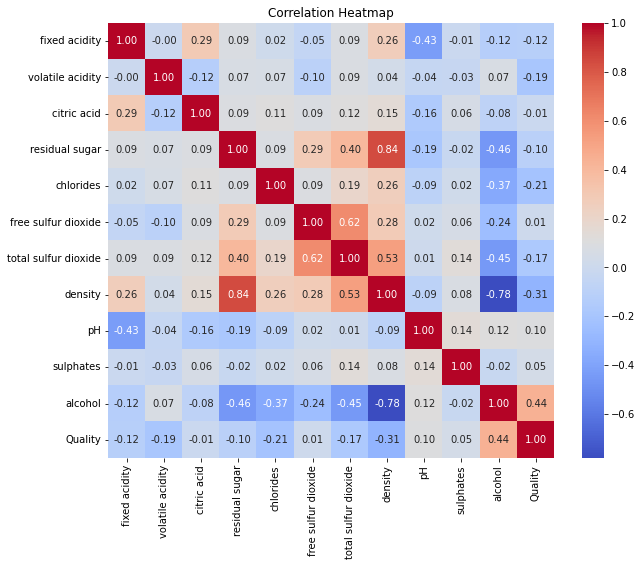

In [33]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Feature Importance (Random Forest)


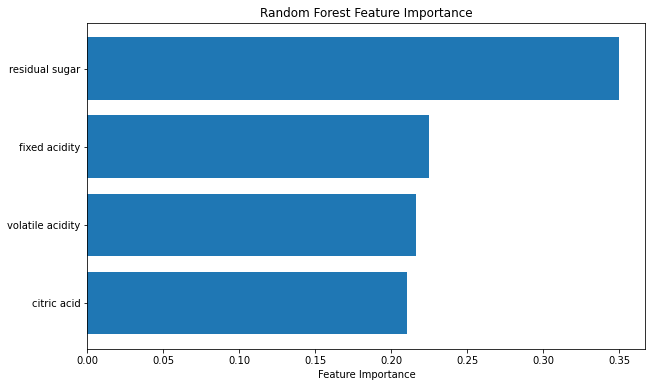

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with the desired parameters
rfc = RandomForestClassifier(max_depth=8, random_state=0)

# Perform feature selection on your training data and store it in sel_X_train
# This should be the step where you use SelectKBest or VarianceThreshold as in your previous code
# For example:
# selector = SelectKBest(chi2, k=4)
# sel_X_train = selector.fit_transform(x_train, y_train)
sel_X_train = selector.transform(X_train_v2)

# Fit the RandomForestClassifier with selected features
rfc.fit(sel_X_train, y_train)

# Access the feature importances
feature_importances = rfc.feature_importances_
feature_names = x_train.columns
sorted_idx = feature_importances.argsort()

# Now you can create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


# F1-Score Comparison:
Create a bar chart to compare F1-scores between different feature selection methods.

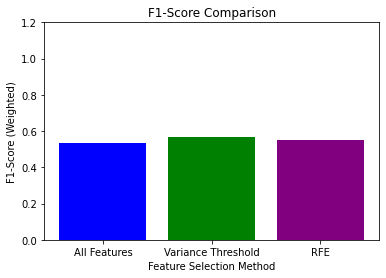

In [30]:
f1_scores = [f1_score_all, f1_score_sel, f1_score_rfe]
methods = ['All Features', 'Variance Threshold', 'RFE']
plt.bar(methods, f1_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Feature Selection Method')
plt.ylabel('F1-Score (Weighted)')
plt.title('F1-Score Comparison')
plt.ylim(0, 1.2)
plt.show()

# Optimal Features vs. Cross-Validation Scores (RFECV):

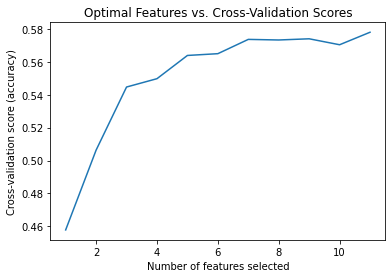

In [31]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(clf.grid_scores_) + 1), clf.grid_scores_)
plt.title('Optimal Features vs. Cross-Validation Scores')
plt.show()


# Submission Data:

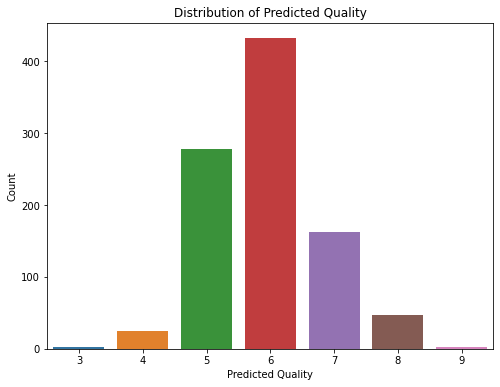

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=final)
plt.xlabel('Predicted Quality')
plt.ylabel('Count')
plt.title('Distribution of Predicted Quality')
plt.show()
